# **08. Learning Phase Angle**

Phase angle determines the phase of the extracted cosine or sine waves from the FFT

## **[1] Preliminaries**

1. Import the libraries
2. Create three sinusoidal waves with varying phase shift and frequencies
3. Merge the three waves

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

### **[1.1] Merge three sinusoidal waves together with varying phase shift and frequencies**

1. Cosine Wave X: 
 
    * $ 1 cos ( 2 \pi (1) t - \frac{3 \pi}{2}) $

2. cos wave Y:
    * $ 4 cos ( 2 \pi (4) t - \frac{\pi}{2}) $

3. cos wave Z:
    * $ 7 cos ( 2 \pi (7) t - \pi) $

In [40]:
# sampling time duration (sec)
std = 5.

# sampling time interval (sec)
ts = 0.01

t = np.arange( 0., std, ts )

freq = 1.
phsx = (2*np.pi) * (3/4)
x = 1. * np.cos( 2*np.pi*freq*t - phsx )

freq = 4.
phsy = (2*np.pi) * (1/4)
y = 0.5 * np.cos( 2*np.pi*freq*t - phsy )

freq = 7.
phsz = (2*np.pi) * (1/2)
z = 3. * np.cos( 2*np.pi*freq*t - phsz )

wave = x + y + z

## **[2] Run the FFT**
* Use the `np.angle( F )` function to get the angle between the real and imaginary values of the FFT
* Use the `np.abs(F)/(N//2)` to get the normalized FFT 

In [41]:
# threshold amplitude to plot phase Spectrum
thas = 0.4

# run FFT
N = t.size
F = fftpack.fft( wave )

pa = np.angle( F )
print("Phase angle extraction: \n{}\n".format(pa[0:10]))

normalizedFFT = np.abs(F)/(N//2)
print("Normalized FFT: \n{}\n".format(normalizedFFT[0:10]))

pa[normalizedFFT < thas] = 0   # zeroed phase angles for amplitudes below thas


print("*Only those who have FFT values have extracted phase angles plotted \n{}\n".format(pa[0:10]))
f = fftpack.fftfreq( N, ts )
mask = np.where( f >= 0 )

Phase angle extraction: 
[-0.          2.10166183 -0.90277526  1.82119288 -2.33830225  1.57079633
 -2.08107447 -0.02689422  0.38157303  2.55810009]

Normalized FFT: 
[1.52589053e-15 1.43911580e-15 7.08096870e-16 8.85257255e-16
 1.61270240e-15 1.00000000e+00 1.44827063e-15 1.24238308e-15
 1.00366393e-15 2.21489772e-15]

*Only those who have FFT values have extracted phase angles plotted 
[0.         0.         0.         0.         0.         1.57079633
 0.         0.         0.         0.        ]



### **[2.1]** Plot the three sinusoidal waves together with varying phase shift and frequencies

1. Cosine Wave X: 
 
    * $ 1 cos ( 2 \pi (1) t - \frac{3 \pi}{2}) $

2. cos wave Y:
    * $ 4 cos ( 2 \pi (4) t - \frac{\pi}{2}) $

3. cos wave Z:
    * $ 7 cos ( 2 \pi (7) t - \pi) $

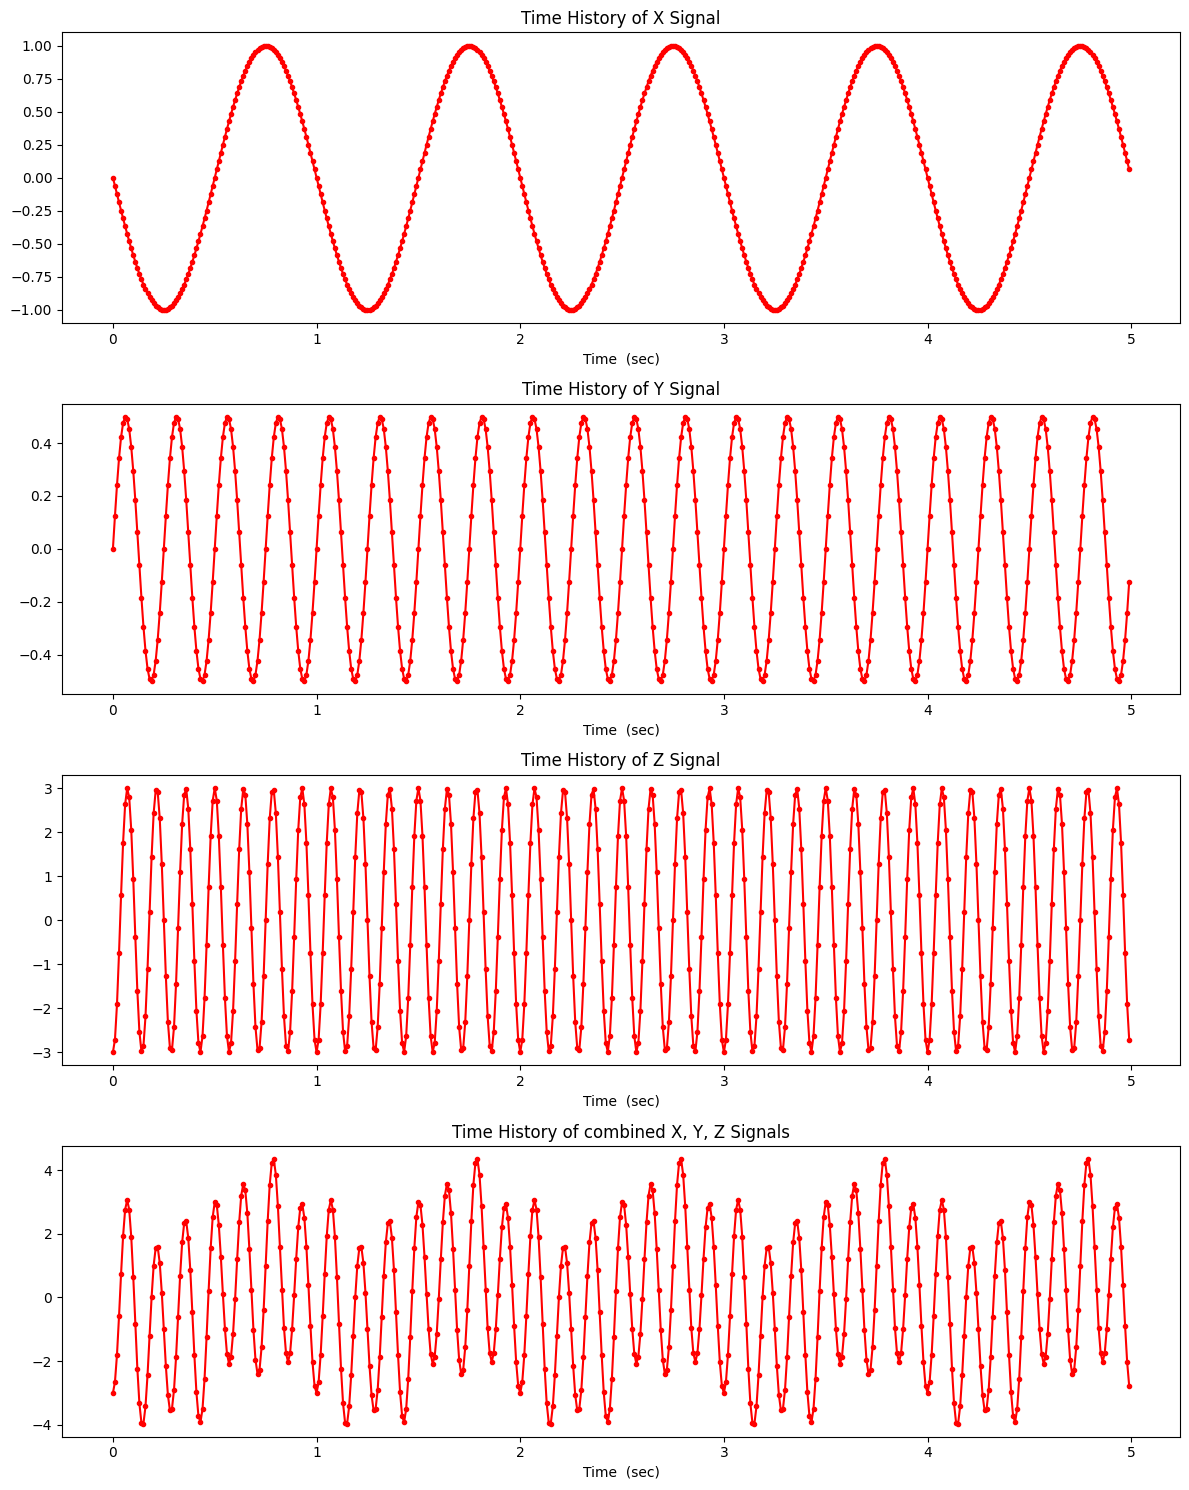

In [42]:
fig, [ax1,ax2,ax3,ax4] = plt.subplots(ncols=1, nrows=4, figsize = (12,15))

ax1.plot(t, x, "r.-")
ax1.set_title("Time History of X Signal")
ax1.set_xlabel("Time  (sec)")

ax2.plot(t, y, "r.-")
ax2.set_title("Time History of Y Signal")
ax2.set_xlabel("Time  (sec)")

ax3.plot(t, z, "r.-")
ax3.set_title("Time History of Z Signal")
ax3.set_xlabel("Time  (sec)")

ax4.plot(t, wave, "r.-")
ax4.set_xlabel("Time  (sec)")
ax4.set_title("Time History of combined X, Y, Z Signals")

plt.tight_layout()
plt.show()

### **[2.2]** Plot the *normalized amplitude* of the FFT and the phase angle with their respective frequency bins

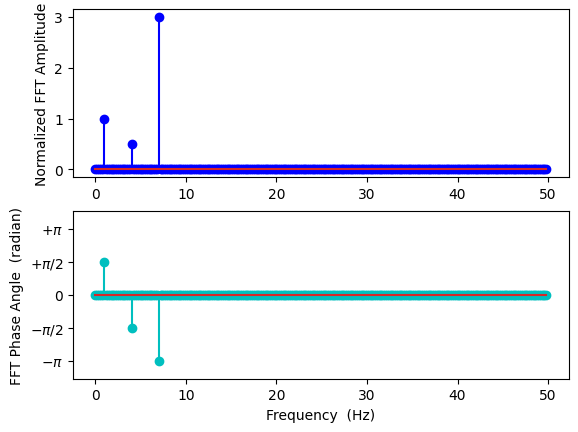

In [43]:
plt.figure(2)
plt.subplot(2,1,1)
plt.stem( f[mask], abs(F[mask])/(N//2), "b" )
#plt.xlabel( "Frequency  (Hz)")
plt.ylabel( "Normalized FFT Amplitude" )

#plt.title( "FFT Amplitude Spectrum" )
plt.subplot(2,1,2)
plt.stem( f[mask], np.unwrap(pa[mask]), "c" )
plt.xlabel( "Frequency  (Hz)")
plt.ylabel( "FFT Phase Angle  (radian)" )
plt.ylim (-4,4)
yt = [ -3.14, -1.57, 0., 1.57, 3.14 ]
ytlabel = [ r"$-\pi$", r"$-\pi/2$", "0", r"$+\pi/2$", r"$+\pi$" ]
plt.yticks( yt, ytlabel )
#plt.title( "FFT Amplitude Spectrum" )
plt.show()

### **[2.3]** Plot the *normalized amplitude* of the FFT and the phase angle with their respective frequency bins narrowing on the 0 - 10 frequency 

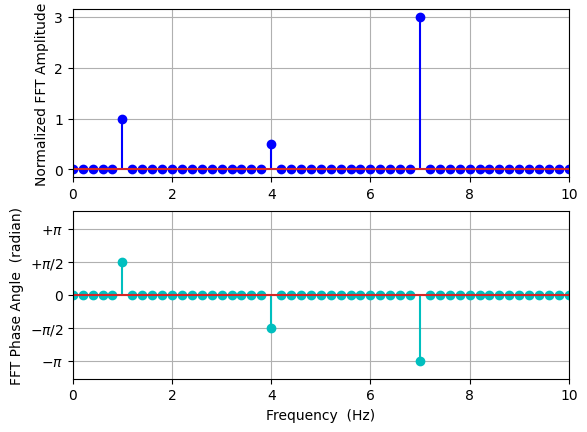

In [44]:
plt.figure(3)
plt.subplot(2,1,1)
plt.stem( f[mask], abs(F[mask])/(N//2), "b" )
#plt.xlabel( "Frequency  (Hz)")
plt.ylabel( "Normalized FFT Amplitude" )
plt.xlim(0,10.)
plt.grid()
#plt.title( "FFT Amplitude Spectrum" )
plt.subplot(2,1,2)
plt.stem( f[mask], np.unwrap(pa[mask]), "c" )
plt.xlabel( "Frequency  (Hz)")
plt.ylabel( "FFT Phase Angle  (radian)" )
plt.xlim(0,10.)
plt.ylim (-4, 4)
plt.grid()
#plt.title( "FFT Amplitude Spectrum" )
yt = [ -3.14, -1.57, 0., 1.57, 3.14 ]
ytlabel = [ r"$-\pi$", r"$-\pi/2$", "0", r"$+\pi/2$", r"$+\pi$" ]
plt.yticks( yt, ytlabel )
plt.show()

# **[3] Other Data for future references**

In [45]:
print("FFT Values:")
print("  F[{}] = {}".format(5,F[5]))
print("  F[{}] = {}".format(20,F[20]))
print("  F[{}] = {}".format(35,F[35]))

print("\nFFT Absolute Values:")
print("  {}".format(abs(F[5])))
print("  {}".format(abs(F[20])))
print("  {}".format(abs(F[35])))

print("\nFrequency Bins:")
print("  {}".format(f[5]))
print("  {}".format(f[20]))
print("  {}".format(f[35]))

print("\nTotal number of samples (N): {}".format(N))
print("N//2: {}".format(N//2))

print("\nSolving for the angles of the 1Hz, 4Hz, and 7 Hz:")
print("  {} rad".format(np.angle(F[5])))
print("  {} rad".format(np.angle(F[20])))
print("  {} rad".format(np.angle(F[35])))

FFT Values:
  F[5] = (4.636291350834654e-13+250.00000000000006j)
  F[20] = (1.9593134106017374e-13-124.99999999999966j)
  F[35] = (-750-1.019831167343344e-12j)

FFT Absolute Values:
  250.00000000000006
  124.99999999999966
  750.0

Frequency Bins:
  1.0
  4.0
  7.0

Total number of samples (N): 500
N//2: 250

Solving for the angles of the 1Hz, 4Hz, and 7 Hz:
  1.5707963267948948 rad
  -1.570796326794895 rad
  -3.141592653589792 rad


# **[4] Understanding Phase Angles**

[*Link to article about phase angles*](https://www.electronics-tutorials.ws/accircuits/phase-difference.html)  
    
**Equation of a cosine wave**
* $ y = A cos( \omega t - \phi) $
  * where:
    * A = amplitude
    * $\omega$ = Period
    * $\phi$ = phase angle in radians that the waveform has shifted either left or right from the reference point 



**The three cosine waves are:**

1. Cosine Wave X: 
 
    * $ 1 cos ( 2 \pi (1) t - \frac{3 \pi}{2}) $

2. cos wave Y:
    * $ 4 cos ( 2 \pi (4) t - \frac{\pi}{2}) $

3. cos wave Z:
    * $ 7 cos ( 2 \pi (7) t - \pi) $

They have their respective phase shifts which are $ \frac{3\pi}{2}$, $\frac{\pi}{2}$, and $\pi$. In the FFT phase angle context, the phase angles extracted were $\frac{\pi}{2}$, $ - \frac{\pi}{2}$, and $ -\pi$  
FFT phase shifts are due to the **angle of the values** from the positive x axis. This can be seen in the graph below where:
1. **1 Hz** - is forming a $\frac{\pi}{2}$ angle from the positive x-axis.
2. **4 Hz** - is forming a $-\frac{\pi}{2}$ angle from the positive x-axis.
3. **7 Hz** - is forming a $- \pi$ angle from the positive x-axis.

## **[4.1] Plotting the real and imaginary numbers**

Data:
[ 4.63629135e-13  1.95931341e-13 -7.50000000e+02]
[ 2.50000000e+02 -1.25000000e+02 -1.01983117e-12]


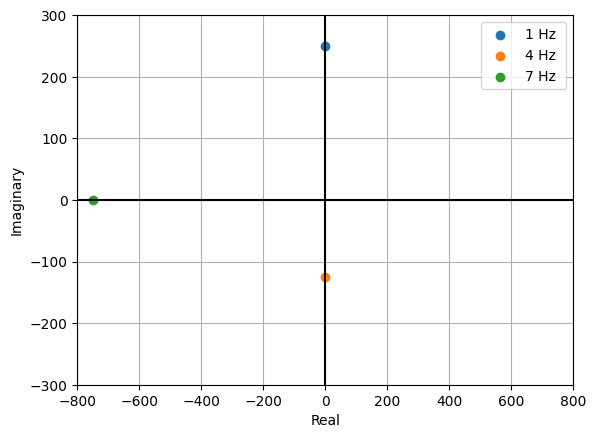

In [46]:
realPart = np.array([F[5].real, F[20].real, F[35].real])
imaginary = np.array([F[5].imag, F[20].imag, F[35].imag])

print("Data:\n{}\n{}".format(realPart, imaginary))

plt.scatter(realPart[0], imaginary[0], label ="1 Hz ")
plt.scatter(realPart[1], imaginary[1], label ="4 Hz ")
plt.scatter(realPart[2], imaginary[2], label ="7 Hz ")
plt.grid()
plt.ylabel("Imaginary")
plt.xlabel("Real")
plt.xlim(-800, 800)
plt.ylim(-300, 300)
plt.axvline(x=0, c="black")
plt.axhline(y=0, c="black")
plt.legend()
plt.show()